In [59]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics.regression import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
import matplotlib.pyplot as plt

In [60]:
data=pd.read_csv('winequality-white.csv')
data.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [61]:
data=pd.read_csv('winequality-white.csv',sep=';')#分隔符比较奇怪，要自己设置
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [62]:
data['quality'].value_counts()#可知品质分布在3-9之间

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [63]:
data.info()#4898个样本,还算多

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [64]:
Y=data['quality']
X=data.drop('quality', axis=1)#将X、Y取好

In [65]:
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(X,Y,test_size=0.3)#分割

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_TRAIN)
X_TEST_scaled = scaler.transform(X_TEST)#标准化

In [74]:
def build_model():
    model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(X_scaled.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

    optimizer = tf.compat.v1.train.RMSPropOptimizer(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
    return model#写个model函数待会训练用

In [75]:
model = build_model()

In [76]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)#用一下earlystop防止过拟合

In [79]:
result=model.fit(X_scaled,Y_TRAIN, epochs=5,validation_split=0.2, verbose=0,callbacks=[early_stop])

In [83]:
model.evaluate(X_TEST_scaled,Y_TEST)#评估一下，貌似还行，loss有点惨不忍睹……

1470/1470 [==============================] - 1s 526us/sample - loss: 0.7173 - mae: 0.6543


[0.7173219620776015, 0.65427303]

In [95]:
pre=model.predict(X_TEST_scaled)

In [96]:
from sklearn import metrics

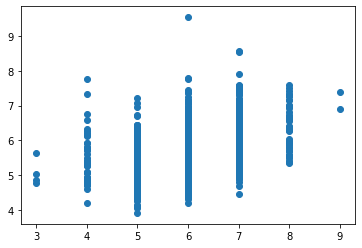

In [97]:
plt.scatter(Y_TEST,pre)#从图上看还是有点离谱

In [98]:
#尝试换个方法

In [116]:
forest = RandomForestRegressor(random_state=17,n_estimators=200)
forest.fit(X_scaled, Y_TRAIN)
forest.score(X_TEST_scaled,Y_TEST)#真的离谱……

0.5414931512715342

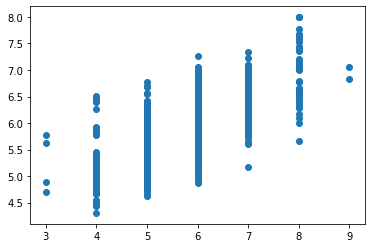

In [117]:
pre2=forest.predict(X_TEST_scaled)
plt.scatter(Y_TEST,pre2)#随机森林看起来半斤八两

In [ ]:
#总体还是不行，也没有交叉验证……估计是我还不会提特征，反正很菜，忘老师包涵……